In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True

np.random.seed(0) # We manually set the seed for reproducible results, this is not required

# Challenge 2

Ghostie v2 counts number (per unit time) of dark matter interactions (`s`), but now there is background (`b`). The only observable available to us is the rate `r`. This observable is expected to follow a Poisson distribution with mean `s + b`. 

We use Poisson distributions since we're now counting discrete occurrences (counts, positive outcomes) over a *continuous* domain (a set amount of time, in this case). This can be seen as infinitely many trials (one for each infinitesimal step of time, large `n`), as opposed to having a *discrete* number of trials (binomial distribution, small `n`).

The null hypothesis is the "only background" hypothesis, and with Ghostie v2 we expect `b = 5`. This means the null hypothesis assumes a Poisson distribution with mean 5. The alternative hypothesis is the "signal + background hypothesis", and in this case we expect `s = 5`, so the alternative hypothesis assumes a Poisson distribution with mean 10 (`s + b`).

If we've measured `r = 10`, compute the p-value and significance of this measurement (has Ghostie v2 discovered DM?), and plot the Poisson distributions assuming only background and background + signal.

In [2]:
from scipy.stats import poisson

s = 5
b = 5
r = s + b

n = 25

n_values = np.arange(0, n + 1)

p_values_background = np.zeros(len(n_values))
p_values_signal = np.zeros(len(n_values))

for i in n_values:
    p_values_background[i] = poisson(b).pmf(i)
    p_values_signal[i] = poisson(r).pmf(i)

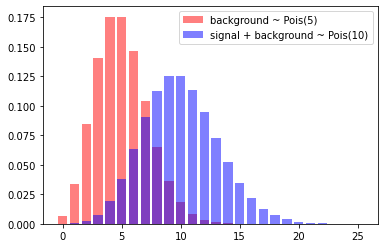

In [3]:
plt.bar(n_values, p_values_background, alpha=0.5, color="red", label=f"background ~ Pois({b})")

plt.bar(n_values, p_values_signal, alpha=0.5, color="blue", label=f"signal + background ~ Pois({r})")

plt.legend()
plt.show()

To compute the p-value we need a way of computing `P(x >= n)`. We could sum all probabilities for `x >= n` or we could use a built-in function such as the survival function `sf`, which is `1 - cdf` (cumulative distribution function) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.sf.html 

In [4]:
from scipy.stats import norm

n = 10

p_value = poisson(b).sf(n - 1) # P(x >= n)
Z = norm.ppf(1 - p_value) # convert to significance level Z

print(f"for a background of b={b} the probability that all of our observed signal (r={r}) comes only from background is {p_value:0.2e} ({p_value*100:0.2f}%), a significance level of {Z:0.2f}")

for a background of b=5 the probability that all of our observed signal (r=10) comes only from background is 3.18e-02 (3.18%), a significance level of 1.85
